
# 项目：调查TMDB电影数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集来源于TMDB(电影数据库)，里面包括1万多条电影数据，包括1960年到2015年的电影数据。其中有imdb id，电影名称，主页，预算，票房，电影发布时间，导演，电影时长，电影类型，制作公司，电影评分数据等。其中电影类型，导演，制作公司等有多个值的列使用'|'进行数据分割。

In [64]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [65]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。

df = pd.read_csv('tmdb-movies.csv')

#检查头5行数据
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
#检查数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 可以看出数据中每一条代表一部电影的基本信息，分类和评分
### 1，可以看出有数据缺失，例如imdb_id, director, tagline, keyword 等
### 2，release_date应该是日期类型
### 3，budget_adj 和 revenue_adj应该合并入budget和revenue
### 4，记录有duplicated但是无空行

In [67]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 可以看出budget，revenue, runtime都有明显的数据错误，不可能为0，查询了原始数据说明，零表示数据缺失

In [68]:
#检查是否有重复记录
sum(df.duplicated())

1

In [69]:
#检查空行
df[df.isnull().all(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [70]:
#拷贝数据，以便数据清洗
df_copy = df.copy()

### 该数据集有重复记录，但是没有空行

## 数据清理
### 删除重复数据，填充空值，并且将budget_adj和revenue_adj加入到budget和revenue中。

In [71]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。

#删除重复数据
df_copy.drop_duplicates(inplace=True)
#填充Unknown作为空值的替代
df_copy.genres.fillna('Unknown', inplace=True)
#将release_date转成日期类型
df_copy['release_date'] = pd.to_datetime(df_copy['release_date'], format='%m/%d/%y')
#将budget_adj和revenue_adj加到budget和revenue中
df_copy.budget = df_copy.budget+df_copy.budget_adj
df_copy.revenue = df_copy.revenue+df_copy.revenue_adj


<a id='eda'></a>
## 探索性数据分析


### 第一个探索问题：每年最受欢迎的电影类别是哪些？

In [72]:
# 用这个代码框和其它代码框探索数据。务必添加
#   Markdown 框，以便归档你的观察和调查结果。

#计算电影的年份范围
begin_year = min(df_copy.release_year)
end_year = max(df_copy.release_year)

#得到电影的类别列表
def get_genres_list(genres_string):
    values = genres_string.split('|')
    return values

#Split电影类别，为每一个类别创建新的纪录
def create_movies_info(genres_list, original_row):
    new_row_list = []
    for genres in genres_list:
        new_row = {}
        new_row['id'] = original_row.id
        new_row['original_title'] = original_row.original_title
        new_row['release_year'] = original_row.release_year
        new_row['genres'] = genres
        new_row['popularity'] = original_row.popularity
        new_row['vote_count'] = original_row.vote_count
        new_row['vote_average'] = original_row.vote_average
        new_row['revenue'] = original_row.revenue
        new_row_list.append(new_row)
    return new_row_list   

#取popularity大于75%的电影为流行电影，进行分析
hot_movie_scores = df_copy.popularity.describe()['75%']
df_hot_movie = df_copy[ df_copy.popularity >= hot_movie_scores] 
df_hot_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717 entries, 0 to 10833
Data columns (total 21 columns):
id                      2717 non-null int64
imdb_id                 2717 non-null object
popularity              2717 non-null float64
budget                  2717 non-null float64
revenue                 2717 non-null float64
original_title          2717 non-null object
cast                    2717 non-null object
homepage                1136 non-null object
director                2717 non-null object
tagline                 2538 non-null object
keywords                2639 non-null object
overview                2717 non-null object
runtime                 2717 non-null int64
genres                  2717 non-null object
production_companies    2707 non-null object
release_date            2717 non-null datetime64[ns]
vote_count              2717 non-null int64
vote_average            2717 non-null float64
release_year            2717 non-null int64
budget_adj              2717 

### 电影的年份从1960年到2015年，取评分高于75%数值为受欢迎的电影

In [73]:
#构建dateframe存储分类以后的电影数据
df_by_genres = pd.DataFrame(columns=['id','original_title','release_year','genres','popularity','vote_count','vote_average','revenue'])
for index, row in df_hot_movie.iterrows():
    genres_list = get_genres_list(row.genres)
    new_row_list = create_movies_info(genres_list, row)
    df_by_genres = df_by_genres.append(new_row_list, ignore_index=True)
    
df_by_genres.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 8 columns):
id                7410 non-null object
original_title    7410 non-null object
release_year      7410 non-null object
genres            7410 non-null object
popularity        7410 non-null float64
vote_count        7410 non-null object
vote_average      7410 non-null float64
revenue           7410 non-null float64
dtypes: float64(3), object(5)
memory usage: 463.2+ KB


### 将电影类型进行解析，如果一部电影归类为多个类型，则每个类型在数据集中都对应一条记录，一部电影可能对应于多条记录。

In [74]:
#获取所有电影类型列表
all_genres = df_by_genres.genres.unique()
all_genres

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

### 共有20种电影类型

In [75]:
#将电影按照年度分类（60s70s, 80s90s, 2000年以后），从而计算每个年度段的流行电影数量
hot_movie_count = pd.DataFrame(0, index=all_genres, columns=['60s70s','80s90s','2000s'])

hot_movie_count_60_70 = df_by_genres.query('release_year>=1960 and release_year<1980').groupby(['genres']).count()['id']
hot_movie_count_80_90 = df_by_genres.query('release_year>=1980 and release_year<2000').groupby(['genres']).count()['id']
hot_movie_count_2000 = df_by_genres.query('release_year>=2000').groupby(['genres']).count()['id']

for index,row in hot_movie_count.iterrows():
    row['60s70s'] = hot_movie_count_60_70.get(index, default=0)
    row['80s90s'] = hot_movie_count_80_90.get(index, default=0)
    row['2000s'] = hot_movie_count_2000.get(index, default=0)
hot_movie_count.head(10)

,60s70s,80s90s,2000s
Action,38,222,563
Adventure,37,176,402
Science Fiction,25,125,259
Thriller,37,213,600
Fantasy,9,100,249
Crime,24,121,302
Western,3,9,24
Drama,54,254,779
Family,17,103,284
Animation,9,44,207


### 上表将热门电影按照年代进行统计，可以发现某些类型明显数量较多（例如Action, Drama,和 Thriller）

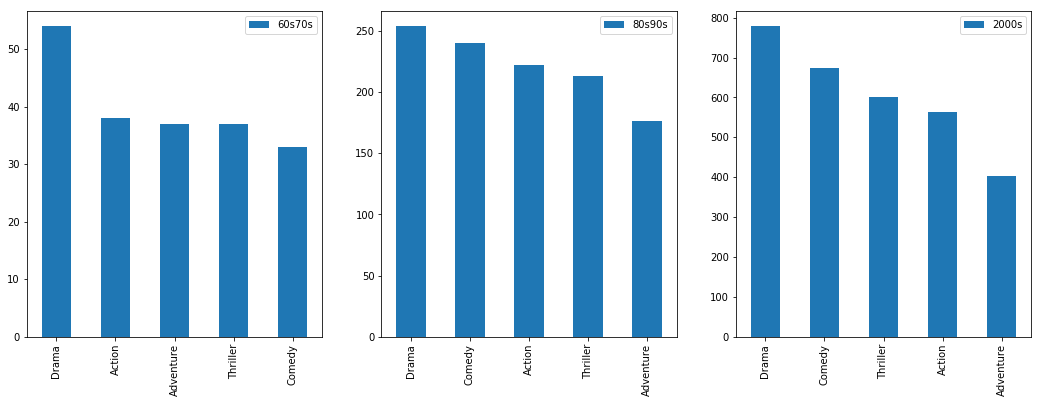

In [76]:
#用bar图显示每个年度段的Top5流行电影类型
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(18, 6))
hot_movie_count['60s70s'].sort_values(ascending=False)[:5].plot(kind='bar', y='60s70s', ax=ax[0], legend=True)
hot_movie_count['80s90s'].sort_values(ascending=False)[:5].plot(kind='bar', y='80s90s', ax=ax[1], legend=True)
hot_movie_count['2000s'].sort_values(ascending=False)[:5].plot(kind='bar', y='2000s', ax=ax[2], legend=True)

### 结论：最后可以看出，从60年代，70年代，一直到2000年以后，Drama都是最流行和热门的电影类型。Action, Adventure和Triller也比较流行。

### 第二个探索问题：票房高的电影有哪些特点？

### 1，首先观察数据基本情况

In [77]:
df_copy.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.217418e+07,9.119590e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,6.471515e+07,2.563610e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,3.773537e+07,5.981348e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,8.500000e+08,5.608630e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 发现有大量的电影票房信息为0，根据数据描述得知0表示没有有效的票房信息，因此过滤掉为0的值

In [78]:
#过滤掉为0的值
df_movie_revenue = df_copy.query('revenue>0')
df_movie_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,6.473169e+07,2.043397e+08,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,8.351813e+07,3.523509e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,4.370705e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,4.103337e+06,1.888606e+07,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,3.693003e+07,7.841746e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,8.862291e+07,2.329456e+08,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,8.500000e+08,5.608630e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### 2，研究票房和投资之间的关系

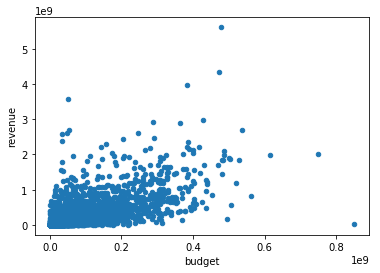

In [79]:
#首先研究票房和投资的关系，由于budget有零的情况，先清理
df_revenue_budget =df_movie_revenue.query('budget>0')
#然后使用scatter图
df_revenue_budget.plot.scatter(x='budget', y='revenue')

##### 由图可知由于少部分极端值的存在，使得该图不容易观察，因此去除头尾5%的极端数据

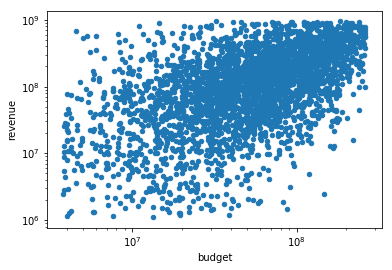

In [80]:
#由图可知由于少部分极端值的存在，使得该图不容易观察，因此去除头尾10%的极端数据
row_count = df_revenue_budget.count()['id']
budget_low = df_revenue_budget.sort_values(by='budget').iloc[int(row_count*0.05)]['budget']
budget_high = df_revenue_budget.sort_values(by='budget').iloc[int(row_count*0.95)]['budget']
revenue_low = df_revenue_budget.sort_values(by='revenue').iloc[int(row_count*0.05)]['revenue']
revenue_high = df_revenue_budget.sort_values(by='revenue').iloc[int(row_count*0.95)]['revenue']
df_revenue_budget = df_revenue_budget[(df_revenue_budget['revenue']>revenue_low) & (df_revenue_budget['revenue']<revenue_high)]
df_revenue_budget = df_revenue_budget[(df_revenue_budget['budget']>budget_low) & (df_revenue_budget['budget']<budget_high)]
#取log使得图形跟能反应数据的倍数关系
df_revenue_budget.plot.scatter(x='budget', y='revenue', loglog=True)

### 从上图可以发现票房和电影的投资没有必然的线性关系，高票房的电影投资未必大，大投资的电影也可能低票房。

### 3，研究电影票房（revenue）和投票数(vote_count), 平均得分（vote_average）的关系

In [81]:
#观察vote_count和vote_average，数据比较干净
df_movie_revenue[['vote_count','vote_average']].describe()

,vote_count,vote_average
count,4849.000000,4849.000000
mean,436.283151,6.149000
std,806.485754,0.798707
min,10.000000,2.100000
25%,46.000000,5.600000
50%,147.000000,6.200000
75%,435.000000,6.700000
max,9767.000000,8.400000


### 观察vote_count和vote_average，其中有些电影vote_count很低

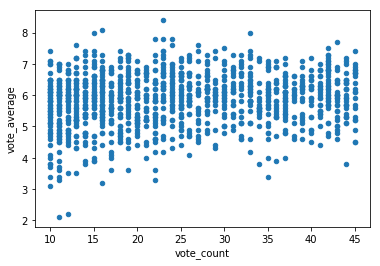

In [82]:
# 46是vote_count的25%中值
df_movie_revenue.query('vote_count<46').plot.scatter(x='vote_count', y='vote_average')

### 观察vote_count小于25%的数据，结果呈现随机游走，太少的vote_count造成vote_average并不可信，因此需要删除vote_count太低的记录，太低的vote_count得到的vote_average值得怀疑

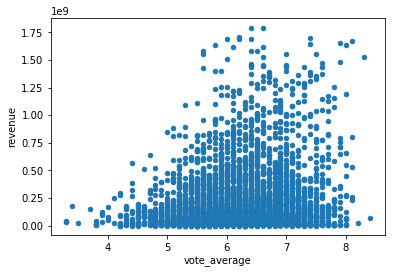

In [83]:
#去除掉revenue最高和最低的1%记录，去掉vote_count小于25%的数据
#利用Scatter观察revenue和vote_average，vote_count的关系
row_count = df_movie_revenue.count()['id']
revenue_low = df_movie_revenue.sort_values(by='revenue').iloc[int(row_count*0.01)]['revenue']
revenue_high = df_movie_revenue.sort_values(by='revenue').iloc[int(row_count*0.99)]['revenue']
df_revenue_clean = df_movie_revenue[(df_movie_revenue['revenue']>revenue_low) & (df_movie_revenue['revenue']<revenue_high)]
df_revenue_clean = df_revenue_clean.query('vote_count>=46')
df_revenue_clean.plot.scatter(x='vote_average', y='revenue')

### 由上图可见票房数据和电影评分呈现左偏态，峰值在6--7分左右，且评分高的电影票房也有更好表现。

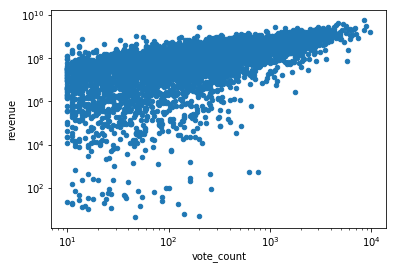

In [84]:
#观察一下vote_count和revenue之间的关系，此部分保留了所有revenue和count的极端数据，因此使用log坐标
df_movie_revenue.plot.scatter(x='vote_count', y='revenue',loglog=True)

### 投票数量和电影票房之间有线性关系，高票房的电影往往有高投票数量。

### 4，最后研究电影类型与其票房收入的关系

In [85]:
#构建含有分类信息的数据集,并且去掉1%的极端数据
row_count = df_movie_revenue.count()['id']
revenue_low = df_movie_revenue.sort_values(by='revenue').iloc[int(row_count*0.01)]['revenue']
revenue_high = df_movie_revenue.sort_values(by='revenue').iloc[int(row_count*0.99)]['revenue']
df_movie_revenue_clean = df_movie_revenue[(df_movie_revenue['revenue']>revenue_low) & (df_movie_revenue['revenue']<revenue_high)]

df_revenue_genres = pd.DataFrame(columns=['id','original_title','release_year','genres','popularity','vote_count','vote_average','revenue'])
for index, row in df_movie_revenue_clean.iterrows():
    genres_list = get_genres_list(row.genres)
    new_row_list = create_movies_info(genres_list, row)
    df_revenue_genres = df_revenue_genres.append(new_row_list, ignore_index=True)
    
df_revenue_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 8 columns):
id                12386 non-null object
original_title    12386 non-null object
release_year      12386 non-null object
genres            12386 non-null object
popularity        12386 non-null float64
vote_count        12386 non-null object
vote_average      12386 non-null float64
revenue           12386 non-null float64
dtypes: float64(3), object(5)
memory usage: 774.2+ KB


In [86]:
df_sorted_revenue = df_revenue_genres.groupby('genres').mean().sort_values(by='revenue', ascending=False)

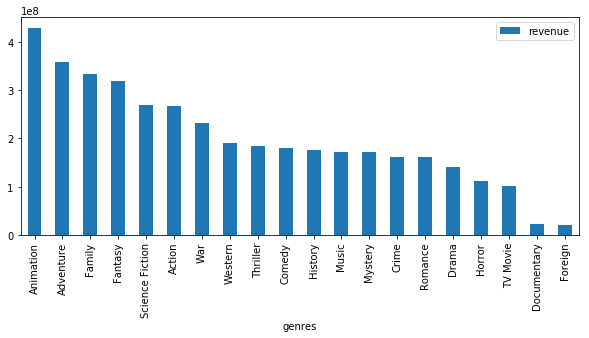

In [87]:
df_sorted_revenue.plot.bar(y='revenue',figsize=(10,4))

### 可以看出高票房电影集中在Animation, Adventure和Fantasy上面

<a id='conclusions'></a>
## 结论

第一部分研究了每年最受欢迎的电影类型，发现Drama是最受欢迎的电影，无论60、70年代，还是2000年之后，都是如此。除了Drama之外, Action, Adventure和Triller也比较流行的电影。

第二部分研究了高票房电影的特点。发现电影的预算投资和电影的票房并没有太多的相关性，很多高投资的电影票房并不高，而不少高票房的却是小制作。高票房的电影主要集中在Animation, Adventure,和Fantasy这几个类别上面。评分高的电影相对于评分低的电影更大比例的获得高票房，而且评分6-7的电影是票房的高峰值。

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255